In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../src/')
from WLNM import PaletteWL
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

## _C.elegans_ neuron connections network

In [4]:
data = pd.read_csv('../../data/NeuronConnect.tsv', sep='\t')

In [5]:
data.head()

,Neuron 1,Neuron 2,Type,Nbr
0,ADAR,ADAL,EJ,1
1,ADFL,ADAL,EJ,1
2,ASHL,ADAL,EJ,1
3,AVDR,ADAL,EJ,2
4,PVQL,ADAL,EJ,1


In [12]:
# convert node labels to integers
labels = set(data['Neuron 1'].values)

In [15]:
labels.update(set(data['Neuron 2'].values))

In [16]:
labels = sorted(list(labels))

In [17]:
# dict
d_labels = {lab:n for n,lab in enumerate(labels)}

In [21]:
data['Neuron_1_lab'] = [d_labels[n] for n in data['Neuron 1']]

In [22]:
data['Neuron_2_lab'] = [d_labels[n] for n in data['Neuron 2']]

In [23]:
g = nx.from_pandas_edgelist(data, source='Neuron_1_lab', target='Neuron_2_lab', edge_attr=['Type','Nbr'])

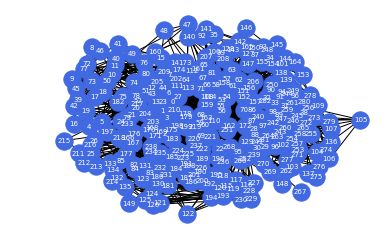

In [24]:
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos=pos, node_color='royalblue', font_color='w', font_size=7)
plt.axis('off')
plt.show()

In [25]:
len(g)

283

## WLNM dataset

In [32]:
wl = PaletteWL(g)

In [33]:
train, test, val = wl.dataset(val_ratio=0.2)

In [34]:
y_train, x_train = train
y_test, x_test = test
y_val, x_val = val

In [35]:
x_train.shape

(2888, 80)

## Neural net model

In [49]:
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout

In [45]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=80))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                5184      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________


In [47]:
history = model.fit(x_train, y_train,batch_size=32, validation_data=(x_val, y_val), epochs=50)

Train on 2888 samples, validate on 962 samples
Epoch 1/50
2888/2888 [==============================] - 0s 88us/step - loss: 0.6546 - acc: 0.6233 - val_loss: 0.6201 - val_acc: 0.6778
Epoch 2/50
2888/2888 [==============================] - 0s 35us/step - loss: 0.6089 - acc: 0.6797 - val_loss: 0.5953 - val_acc: 0.6830
Epoch 3/50
2888/2888 [==============================] - 0s 37us/step - loss: 0.5854 - acc: 0.7008 - val_loss: 0.5820 - val_acc: 0.7079
Epoch 4/50
2888/2888 [==============================] - 0s 34us/step - loss: 0.5639 - acc: 0.7261 - val_loss: 0.5664 - val_acc: 0.7027
Epoch 5/50
2888/2888 [==============================] - 0s 35us/step - loss: 0.5436 - acc: 0.7358 - val_loss: 0.5489 - val_acc: 0.7089
Epoch 6/50
2888/2888 [==============================] - 0s 33us/step - loss: 0.5249 - acc: 0.7524 - val_loss: 0.5399 - val_acc: 0.7162
Epoch 7/50
2888/2888 [==============================] - 0s 32us/step - loss: 0.5074 - acc: 0.7618 - val_loss: 0.5249 - val_acc: 0.7339
Epoch 8/

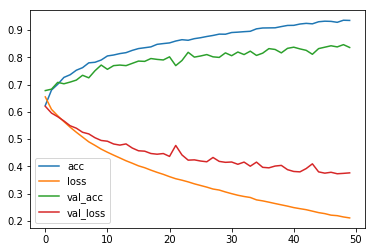

In [48]:
pd.DataFrame(history.history).plot()
plt.show()

We start to see some overfitting around step 5. Let's add dropout.

In [61]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=80))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [62]:
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                5184      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 2         
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


In [64]:
history = model.fit(x_train, y_train,batch_size=32, validation_data=(x_val, y_val), epochs=200)

Train on 2888 samples, validate on 962 samples
Epoch 1/200
2888/2888 [==============================] - 0s 126us/step - loss: 0.6929 - acc: 0.4986 - val_loss: 0.6918 - val_acc: 0.5021
Epoch 2/200
2888/2888 [==============================] - 0s 36us/step - loss: 0.6909 - acc: 0.5332 - val_loss: 0.6884 - val_acc: 0.6320
Epoch 3/200
2888/2888 [==============================] - 0s 40us/step - loss: 0.6868 - acc: 0.6046 - val_loss: 0.6831 - val_acc: 0.6445
Epoch 4/200
2888/2888 [==============================] - 0s 43us/step - loss: 0.6817 - acc: 0.6513 - val_loss: 0.6781 - val_acc: 0.6476
Epoch 5/200
2888/2888 [==============================] - 0s 38us/step - loss: 0.6774 - acc: 0.6402 - val_loss: 0.6733 - val_acc: 0.6726
Epoch 6/200
2888/2888 [==============================] - 0s 39us/step - loss: 0.6718 - acc: 0.6596 - val_loss: 0.6683 - val_acc: 0.6684
Epoch 7/200
2888/2888 [==============================] - 0s 36us/step - loss: 0.6668 - acc: 0.6700 - val_loss: 0.6629 - val_acc: 0.6674


2888/2888 [==============================] - 0s 38us/step - loss: 0.4380 - acc: 0.8220 - val_loss: 0.4793 - val_acc: 0.7827
Epoch 61/200
2888/2888 [==============================] - 0s 37us/step - loss: 0.4424 - acc: 0.8186 - val_loss: 0.4769 - val_acc: 0.7879
Epoch 62/200
2888/2888 [==============================] - 0s 35us/step - loss: 0.4399 - acc: 0.8172 - val_loss: 0.4728 - val_acc: 0.7838
Epoch 63/200
2888/2888 [==============================] - 0s 47us/step - loss: 0.4444 - acc: 0.8116 - val_loss: 0.4711 - val_acc: 0.7890
Epoch 64/200
2888/2888 [==============================] - 0s 34us/step - loss: 0.4348 - acc: 0.8272 - val_loss: 0.4707 - val_acc: 0.7827
Epoch 65/200
2888/2888 [==============================] - 0s 41us/step - loss: 0.4255 - acc: 0.8352 - val_loss: 0.4710 - val_acc: 0.7900
Epoch 66/200
2888/2888 [==============================] - 0s 37us/step - loss: 0.4237 - acc: 0.8293 - val_loss: 0.4662 - val_acc: 0.7942
Epoch 67/200
2888/2888 [==============================

Epoch 120/200
2888/2888 [==============================] - 0s 40us/step - loss: 0.3194 - acc: 0.8826 - val_loss: 0.3916 - val_acc: 0.8254
Epoch 121/200
2888/2888 [==============================] - 0s 38us/step - loss: 0.3276 - acc: 0.8857 - val_loss: 0.3932 - val_acc: 0.8306
Epoch 122/200
2888/2888 [==============================] - 0s 36us/step - loss: 0.3269 - acc: 0.8729 - val_loss: 0.3922 - val_acc: 0.8337
Epoch 123/200
2888/2888 [==============================] - 0s 42us/step - loss: 0.3305 - acc: 0.8788 - val_loss: 0.3909 - val_acc: 0.8306
Epoch 124/200
2888/2888 [==============================] - 0s 37us/step - loss: 0.3306 - acc: 0.8726 - val_loss: 0.3888 - val_acc: 0.8326
Epoch 125/200
2888/2888 [==============================] - 0s 36us/step - loss: 0.3291 - acc: 0.8722 - val_loss: 0.3938 - val_acc: 0.8326
Epoch 126/200
2888/2888 [==============================] - 0s 40us/step - loss: 0.3284 - acc: 0.8729 - val_loss: 0.3941 - val_acc: 0.8316
Epoch 127/200
2888/2888 [=========

2888/2888 [==============================] - 0s 37us/step - loss: 0.2777 - acc: 0.8940 - val_loss: 0.3606 - val_acc: 0.8410
Epoch 180/200
2888/2888 [==============================] - 0s 34us/step - loss: 0.2776 - acc: 0.8895 - val_loss: 0.3522 - val_acc: 0.8462
Epoch 181/200
2888/2888 [==============================] - 0s 40us/step - loss: 0.2619 - acc: 0.9041 - val_loss: 0.3580 - val_acc: 0.8378
Epoch 182/200
2888/2888 [==============================] - 0s 38us/step - loss: 0.2670 - acc: 0.9010 - val_loss: 0.3596 - val_acc: 0.8441
Epoch 183/200
2888/2888 [==============================] - 0s 41us/step - loss: 0.2858 - acc: 0.8937 - val_loss: 0.3554 - val_acc: 0.8430
Epoch 184/200
2888/2888 [==============================] - 0s 37us/step - loss: 0.2677 - acc: 0.9017 - val_loss: 0.3535 - val_acc: 0.8472
Epoch 185/200
2888/2888 [==============================] - 0s 36us/step - loss: 0.2699 - acc: 0.9027 - val_loss: 0.3555 - val_acc: 0.8420
Epoch 186/200
2888/2888 [=======================

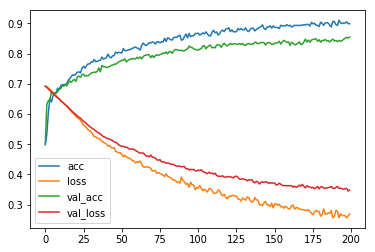

In [65]:
pd.DataFrame(history.history).plot()
plt.show()

In [66]:
# test set
score = model.evaluate(x_test, y_test, batch_size=32)

962/962 [==============================] - 0s 38us/step


In [67]:
score

[0.39146486460666896, 0.8503118503118503]

Accuracy on the test set is 85% with this baseline model.

## Convolutional net

In [68]:
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

In [126]:
from keras.optimizers import RMSprop
from keras.regularizers import l2

In [102]:
mod_x_train = np.expand_dims(x_train, axis=2)

In [103]:
mod_x_train.shape

(2888, 80, 1)

In [106]:
mod_x_val = np.expand_dims(x_val, axis=2)

In [139]:
model = Sequential()
model.add(Conv1D(64,3, activation='relu', input_shape=(80,1)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=5e-4),
              metrics=['accuracy'])

In [140]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_76 (Conv1D)           (None, 78, 64)            256       
_________________________________________________________________
conv1d_77 (Conv1D)           (None, 76, 64)            12352     
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 25, 64)            0         
_________________________________________________________________
conv1d_78 (Conv1D)           (None, 23, 128)           24704     
_________________________________________________________________
conv1d_79 (Conv1D)           (None, 21, 128)           49280     
_________________________________________________________________
global_average_pooling1d_17  (None, 128)               0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
__________

In [141]:
history = model.fit(mod_x_train, y_train,batch_size=16, validation_data=(mod_x_val, y_val), epochs=100)

Train on 2888 samples, validate on 962 samples
Epoch 1/100
2888/2888 [==============================] - 2s 692us/step - loss: 0.6815 - acc: 0.5682 - val_loss: 0.6564 - val_acc: 0.6008
Epoch 2/100
2888/2888 [==============================] - 1s 457us/step - loss: 0.6404 - acc: 0.6395 - val_loss: 0.6435 - val_acc: 0.6299
Epoch 3/100
2888/2888 [==============================] - 1s 451us/step - loss: 0.6186 - acc: 0.6766 - val_loss: 0.5930 - val_acc: 0.6809
Epoch 4/100
2888/2888 [==============================] - 1s 454us/step - loss: 0.5984 - acc: 0.6925 - val_loss: 0.5804 - val_acc: 0.6944
Epoch 5/100
2888/2888 [==============================] - 1s 447us/step - loss: 0.5849 - acc: 0.7095 - val_loss: 0.5811 - val_acc: 0.7162
Epoch 6/100
2888/2888 [==============================] - 1s 446us/step - loss: 0.5680 - acc: 0.7268 - val_loss: 0.5516 - val_acc: 0.7568
Epoch 7/100
2888/2888 [==============================] - 1s 443us/step - loss: 0.5485 - acc: 0.7330 - val_loss: 0.5189 - val_acc: 0

2888/2888 [==============================] - 1s 443us/step - loss: 0.2118 - acc: 0.9176 - val_loss: 0.2810 - val_acc: 0.8857
Epoch 61/100
2888/2888 [==============================] - 1s 429us/step - loss: 0.2111 - acc: 0.9172 - val_loss: 0.2669 - val_acc: 0.8919
Epoch 62/100
2888/2888 [==============================] - 1s 436us/step - loss: 0.2040 - acc: 0.9231 - val_loss: 0.3298 - val_acc: 0.8805
Epoch 63/100
2888/2888 [==============================] - 1s 440us/step - loss: 0.2061 - acc: 0.9207 - val_loss: 0.3109 - val_acc: 0.8753
Epoch 64/100
2888/2888 [==============================] - 1s 440us/step - loss: 0.2023 - acc: 0.9262 - val_loss: 0.2896 - val_acc: 0.8867
Epoch 65/100
2888/2888 [==============================] - 1s 434us/step - loss: 0.2036 - acc: 0.9211 - val_loss: 0.2667 - val_acc: 0.8794
Epoch 66/100
2888/2888 [==============================] - 1s 442us/step - loss: 0.1917 - acc: 0.9238 - val_loss: 0.2846 - val_acc: 0.8867
Epoch 67/100
2888/2888 [=======================

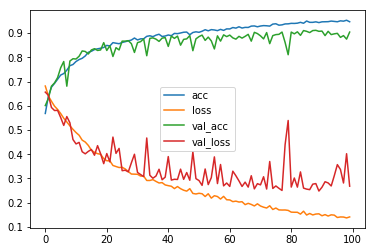

In [142]:
pd.DataFrame(history.history).plot()
plt.show()

In [143]:
# test set
mod_x_test = np.expand_dims(x_test, axis=2)

In [144]:
score = model.evaluate(mod_x_test, y_test, batch_size=16)

962/962 [==============================] - 0s 163us/step


In [145]:
score

[0.28392884313378663, 0.91683991683991684]

91% of accuracy is better than the baseline model.

In [175]:
# Larger filter
model = Sequential()
model.add(Conv1D(64, 5, activation='relu', input_shape=(80,1)))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=5e-4),
              metrics=['accuracy'])

In [176]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_92 (Conv1D)           (None, 76, 64)            384       
_________________________________________________________________
conv1d_93 (Conv1D)           (None, 72, 64)            20544     
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 24, 64)            0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 24, 64)            0         
_________________________________________________________________
conv1d_94 (Conv1D)           (None, 20, 128)           41088     
_________________________________________________________________
conv1d_95 (Conv1D)           (None, 16, 128)           82048     
_________________________________________________________________
global_average_pooling1d_18  (None, 128)               0         
__________

In [177]:
history = model.fit(mod_x_train, y_train,batch_size=16, validation_data=(mod_x_val, y_val), epochs=100)

Train on 2888 samples, validate on 962 samples
Epoch 1/100
2888/2888 [==============================] - 3s 1ms/step - loss: 0.6782 - acc: 0.5751 - val_loss: 0.6433 - val_acc: 0.6455
Epoch 2/100
2888/2888 [==============================] - 2s 571us/step - loss: 0.6476 - acc: 0.6260 - val_loss: 0.6218 - val_acc: 0.6559
Epoch 3/100
2888/2888 [==============================] - 2s 570us/step - loss: 0.6310 - acc: 0.6420 - val_loss: 0.6006 - val_acc: 0.6985
Epoch 4/100
2888/2888 [==============================] - 2s 557us/step - loss: 0.6173 - acc: 0.6572 - val_loss: 0.5900 - val_acc: 0.7079
Epoch 5/100
2888/2888 [==============================] - 2s 553us/step - loss: 0.6008 - acc: 0.6846 - val_loss: 0.5585 - val_acc: 0.7308
Epoch 6/100
2888/2888 [==============================] - 2s 556us/step - loss: 0.5844 - acc: 0.7053 - val_loss: 0.5429 - val_acc: 0.7380
Epoch 7/100
2888/2888 [==============================] - 2s 542us/step - loss: 0.5622 - acc: 0.7168 - val_loss: 0.5804 - val_acc: 0.6

2888/2888 [==============================] - 2s 532us/step - loss: 0.2491 - acc: 0.9079 - val_loss: 0.2482 - val_acc: 0.8971
Epoch 61/100
2888/2888 [==============================] - 2s 544us/step - loss: 0.2466 - acc: 0.9065 - val_loss: 0.2098 - val_acc: 0.9179
Epoch 62/100
2888/2888 [==============================] - 2s 553us/step - loss: 0.2435 - acc: 0.9048 - val_loss: 0.3021 - val_acc: 0.8909
Epoch 63/100
2888/2888 [==============================] - 2s 565us/step - loss: 0.2308 - acc: 0.9127 - val_loss: 0.2799 - val_acc: 0.9106
Epoch 64/100
2888/2888 [==============================] - 2s 556us/step - loss: 0.2409 - acc: 0.9152 - val_loss: 0.2294 - val_acc: 0.9189
Epoch 65/100
2888/2888 [==============================] - 2s 555us/step - loss: 0.2330 - acc: 0.9127 - val_loss: 0.2100 - val_acc: 0.9189
Epoch 66/100
2888/2888 [==============================] - 2s 541us/step - loss: 0.2345 - acc: 0.9096 - val_loss: 0.2462 - val_acc: 0.9116
Epoch 67/100
2888/2888 [=======================

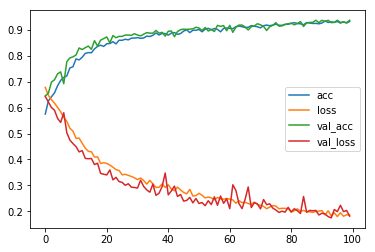

In [178]:
pd.DataFrame(history.history).plot()
plt.show()

In [179]:
score = model.evaluate(mod_x_test, y_test, batch_size=16)
score

962/962 [==============================] - 0s 200us/step


[0.2169726175602657, 0.93762993762993763]

In [186]:
# deeper model
model = Sequential()
model.add(Conv1D(8, 3, activation='relu', input_shape=(80,1)))
model.add(Conv1D(8, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.5))
model.add(Conv1D(16, 3, activation='relu'))
model.add(Conv1D(16, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.5))
model.add(Conv1D(32, 3, activation='relu'))
model.add(Conv1D(32, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=5e-4),
              metrics=['accuracy'])

In [187]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_132 (Conv1D)          (None, 78, 8)             32        
_________________________________________________________________
conv1d_133 (Conv1D)          (None, 76, 8)             200       
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 25, 8)             0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 25, 8)             0         
_________________________________________________________________
conv1d_134 (Conv1D)          (None, 23, 16)            400       
_________________________________________________________________
conv1d_135 (Conv1D)          (None, 21, 16)            784       
_________________________________________________________________
max_pooling1d_37 (MaxPooling (None, 7, 16)             0         
__________

In [188]:
history = model.fit(mod_x_train, y_train,batch_size=16, validation_data=(mod_x_val, y_val), epochs=100)

Train on 2888 samples, validate on 962 samples
Epoch 1/100
2888/2888 [==============================] - 3s 965us/step - loss: 0.6935 - acc: 0.5145 - val_loss: 0.6923 - val_acc: 0.5416
Epoch 2/100
2888/2888 [==============================] - 1s 299us/step - loss: 0.6914 - acc: 0.5242 - val_loss: 0.6900 - val_acc: 0.5832
Epoch 3/100
2888/2888 [==============================] - 1s 290us/step - loss: 0.6893 - acc: 0.5395 - val_loss: 0.6856 - val_acc: 0.6268
Epoch 4/100
2888/2888 [==============================] - 1s 291us/step - loss: 0.6837 - acc: 0.5689 - val_loss: 0.6814 - val_acc: 0.5104
Epoch 5/100
2888/2888 [==============================] - 1s 297us/step - loss: 0.6731 - acc: 0.5914 - val_loss: 0.6615 - val_acc: 0.6715
Epoch 6/100
2888/2888 [==============================] - 1s 289us/step - loss: 0.6698 - acc: 0.5938 - val_loss: 0.6567 - val_acc: 0.6455
Epoch 7/100
2888/2888 [==============================] - 1s 286us/step - loss: 0.6639 - acc: 0.6091 - val_loss: 0.6502 - val_acc: 0

2888/2888 [==============================] - 1s 279us/step - loss: 0.6063 - acc: 0.6731 - val_loss: 0.6092 - val_acc: 0.6684
Epoch 61/100
2888/2888 [==============================] - 1s 281us/step - loss: 0.6114 - acc: 0.6714 - val_loss: 0.5973 - val_acc: 0.6892
Epoch 62/100
2888/2888 [==============================] - 1s 306us/step - loss: 0.6041 - acc: 0.6776 - val_loss: 0.6088 - val_acc: 0.6663
Epoch 63/100
2888/2888 [==============================] - 1s 308us/step - loss: 0.6088 - acc: 0.6804 - val_loss: 0.5949 - val_acc: 0.7006
Epoch 64/100
2888/2888 [==============================] - 1s 312us/step - loss: 0.6018 - acc: 0.6811 - val_loss: 0.6029 - val_acc: 0.6965
Epoch 65/100
2888/2888 [==============================] - 1s 281us/step - loss: 0.6044 - acc: 0.6814 - val_loss: 0.6131 - val_acc: 0.6601
Epoch 66/100
2888/2888 [==============================] - 1s 289us/step - loss: 0.6054 - acc: 0.6794 - val_loss: 0.6055 - val_acc: 0.6705
Epoch 67/100
2888/2888 [=======================

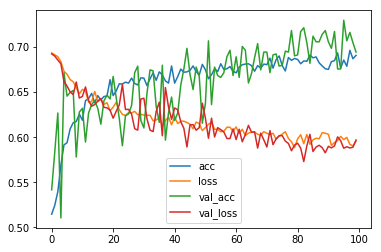

In [189]:
pd.DataFrame(history.history).plot()
plt.show()

## Recurrent Neural Net

In [146]:
from keras.layers import GRU

In [154]:
model = Sequential()
model.add(GRU(64, input_shape=(80,1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [155]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 64)                12672     
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 65        
Total params: 12,737
Trainable params: 12,737
Non-trainable params: 0
_________________________________________________________________


In [156]:
history = model.fit(mod_x_train, y_train,batch_size=16, validation_data=(mod_x_val, y_val), epochs=50)

Train on 2888 samples, validate on 962 samples
Epoch 1/50
2888/2888 [==============================] - 5s 2ms/step - loss: 0.6878 - acc: 0.5665 - val_loss: 0.6712 - val_acc: 0.5988
Epoch 2/50
2888/2888 [==============================] - 4s 1ms/step - loss: 0.6729 - acc: 0.5935 - val_loss: 0.6684 - val_acc: 0.5915
Epoch 3/50
2888/2888 [==============================] - 4s 1ms/step - loss: 0.6648 - acc: 0.6080 - val_loss: 0.6581 - val_acc: 0.6029
Epoch 4/50
2888/2888 [==============================] - 4s 1ms/step - loss: 0.6542 - acc: 0.6278 - val_loss: 0.6291 - val_acc: 0.6559
Epoch 5/50
2888/2888 [==============================] - 4s 1ms/step - loss: 0.6452 - acc: 0.6461 - val_loss: 0.6420 - val_acc: 0.6486
Epoch 6/50
2888/2888 [==============================] - 4s 1ms/step - loss: 0.6495 - acc: 0.6340 - val_loss: 0.6310 - val_acc: 0.6570
Epoch 7/50
2888/2888 [==============================] - 4s 1ms/step - loss: 0.6441 - acc: 0.6375 - val_loss: 0.6315 - val_acc: 0.6590
Epoch 8/50
2888

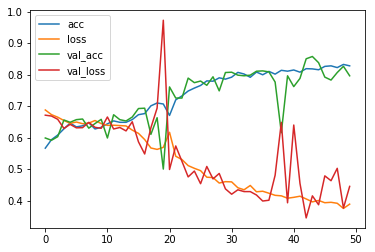

In [157]:
pd.DataFrame(history.history).plot()
plt.show()

In [158]:
# stacking GRU
model = Sequential()
model.add(GRU(64, return_sequences=True, input_shape=(80,1)))
model.add(GRU(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [159]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 80, 64)            12672     
_________________________________________________________________
gru_5 (GRU)                  (None, 128)               74112     
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 129       
Total params: 86,913
Trainable params: 86,913
Non-trainable params: 0
_________________________________________________________________


In [160]:
history = model.fit(mod_x_train, y_train,batch_size=16, validation_data=(mod_x_val, y_val), epochs=50)

Train on 2888 samples, validate on 962 samples
Epoch 1/50
2888/2888 [==============================] - 10s 3ms/step - loss: 0.6771 - acc: 0.5807 - val_loss: 0.7029 - val_acc: 0.5644
Epoch 2/50
2888/2888 [==============================] - 8s 3ms/step - loss: 0.6693 - acc: 0.6018 - val_loss: 0.6792 - val_acc: 0.5800
Epoch 3/50
2888/2888 [==============================] - 8s 3ms/step - loss: 0.6714 - acc: 0.5883 - val_loss: 0.6645 - val_acc: 0.5842
Epoch 4/50
2888/2888 [==============================] - 8s 3ms/step - loss: 0.6645 - acc: 0.6250 - val_loss: 0.6525 - val_acc: 0.6466
Epoch 5/50
2888/2888 [==============================] - 9s 3ms/step - loss: 0.6647 - acc: 0.5918 - val_loss: 0.6463 - val_acc: 0.6559
Epoch 6/50
2888/2888 [==============================] - 8s 3ms/step - loss: 0.6498 - acc: 0.6350 - val_loss: 0.6560 - val_acc: 0.6383
Epoch 7/50
2888/2888 [==============================] - 8s 3ms/step - loss: 0.6433 - acc: 0.6420 - val_loss: 0.6283 - val_acc: 0.6549
Epoch 8/50
288

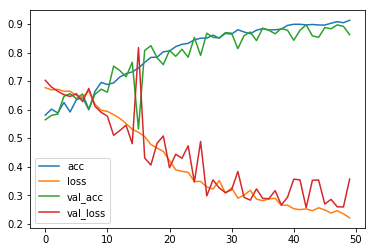

In [161]:
pd.DataFrame(history.history).plot()
plt.show()

In [162]:
# test set
score = model.evaluate(mod_x_test, y_test, batch_size=16)
score

962/962 [==============================] - 1s 722us/step


[0.32133599186389711, 0.87733887733887739]

87% accuracy for the RNN model with a limited number of training steps.

## Bidirectional RNN

In [163]:
from keras.layers import Bidirectional

In [165]:
model = Sequential()
model.add(Bidirectional(GRU(64), input_shape=(80,1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [166]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 128)               25344     
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 129       
Total params: 25,473
Trainable params: 25,473
Non-trainable params: 0
_________________________________________________________________


In [167]:
history = model.fit(mod_x_train, y_train,batch_size=16, validation_data=(mod_x_val, y_val), epochs=50)

Train on 2888 samples, validate on 962 samples
Epoch 1/50
2888/2888 [==============================] - 6s 2ms/step - loss: 0.6863 - acc: 0.5831 - val_loss: 0.6747 - val_acc: 0.6143
Epoch 2/50
2888/2888 [==============================] - 5s 2ms/step - loss: 0.6712 - acc: 0.6046 - val_loss: 0.6792 - val_acc: 0.5447
Epoch 3/50
2888/2888 [==============================] - 5s 2ms/step - loss: 0.6587 - acc: 0.6198 - val_loss: 0.6613 - val_acc: 0.6227
Epoch 4/50
2888/2888 [==============================] - 5s 2ms/step - loss: 0.6577 - acc: 0.6160 - val_loss: 0.6577 - val_acc: 0.6195
Epoch 5/50
2888/2888 [==============================] - 5s 2ms/step - loss: 0.6530 - acc: 0.6191 - val_loss: 0.6371 - val_acc: 0.6570
Epoch 6/50
2888/2888 [==============================] - 5s 2ms/step - loss: 0.6423 - acc: 0.6399 - val_loss: 0.6500 - val_acc: 0.5956
Epoch 7/50
2888/2888 [==============================] - 5s 2ms/step - loss: 0.6436 - acc: 0.6316 - val_loss: 0.6341 - val_acc: 0.6653
Epoch 8/50
2888

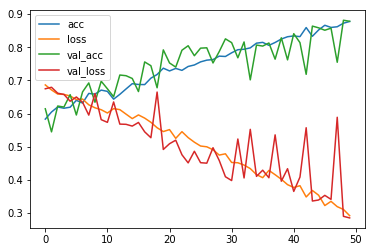

In [168]:
pd.DataFrame(history.history).plot()
plt.show()

In [169]:
# test set
score = model.evaluate(mod_x_test, y_test, batch_size=16)
score

962/962 [==============================] - 0s 317us/step


[0.27270552528375397, 0.88669438669438672]

88% accuracy for the bidirectional version of the RNN is about the same as the mono directional version. This is still on a limited number of steps.